<a href="https://colab.research.google.com/github/youssef02/Brazilian-E-Commerce-Public-Dataset-by-Olist/blob/main/AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy import stats
from dfply import *
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import pprint

plt.style.use('fivethirtyeight')
plot_templ = "seaborn"
plot_width_small = 600
plpt_width_normal = 800
clr_conti = px.colors.diverging.RdYlGn
clr_conti_r = px.colors.diverging.RdYlGn_r
clr_discrete = px.colors.qualitative.Set1
clr_discrete_r = px.colors.qualitative.Set1_r

pp = pprint.PrettyPrinter(indent=4)

from dfply import *

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
import squarify as sq

## Reading the datasets 

In [ ]:
# replace the product categorie names to english
products = pd.read_csv("olist_products_dataset.csv")
prod_cat_name_tr = pd.read_csv("product_category_name_translation.csv")
products = products.merge(prod_cat_name_tr, on='product_category_name', how='left')
products.drop ('product_category_name', axis=1, inplace=True)

In [ ]:
#load all the tables
o_items = pd.read_csv("olist_order_items_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
o_payments = pd.read_csv("olist_order_payments_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
product = pd.read_csv ("olist_products_dataset.csv")

In [ ]:
# merge all the tables in one dataframe
olist = orders.merge(o_items, on='order_id', how='left')
olist = olist.merge(o_payments, on='order_id', how='outer', validate='m:m')
olist = olist.merge(product, on='product_id', how='outer')
olist = olist.merge(customers, on='customer_id', how='outer')
olist = olist.merge(sellers, on='seller_id', how='outer')

In [ ]:
olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP


In [ ]:
#checking the shape of the data
print('Data contains', olist.shape[0], 'rows and', df.shape[1], 'columns')

Data contains 118434 rows and 33 columns


In [ ]:
# Checking for duplicates
print("Total number of duplicate rows: ", olist.duplicated().sum())

Total number of duplicate rows:  0


In [ ]:
type_and_missing = pd.concat([olist.isnull().sum().sort_values(ascending = False), 
                              ((olist.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False), 
                              olist.dtypes], axis=1, keys=['Total', 'Missing_%','Type'])
type_and_missing[type_and_missing['Total'] > 0]

,Total,Missing_%,Type
order_delivered_customer_date,3397,0.752441,object
product_name_lenght,2528,0.559956,float64
product_category_name,2528,0.559956,object
product_photos_qty,2528,0.559956,float64
product_description_lenght,2528,0.559956,float64
order_delivered_carrier_date,2074,0.459394,object
product_weight_g,850,0.188276,float64
product_width_cm,850,0.188276,float64
product_length_cm,850,0.188276,float64
product_height_cm,850,0.188276,float64


In [ ]:
#Drop nan values
before_drop = olist.shape[0]
olist= olist.dropna()
after_drop = olist.shape[0]
print(f'There is {round(((before_drop-after_drop)/after_drop)*100,2)}% nan values ')

There is 4.45% nan values 


In [ ]:
# convert dates

In [ ]:
# Correction dates
olist['order_purchase_timestamp'] = pd.to_datetime(olist.order_purchase_timestamp)
olist['order_approved_at'] = pd.to_datetime(olist.order_approved_at)
olist['order_delivered_carrier_date'] = pd.to_datetime(olist.order_delivered_carrier_date)
olist['order_delivered_customer_date'] = pd.to_datetime(olist.order_delivered_customer_date)
olist['order_estimated_delivery_date'] = pd.to_datetime(olist.order_estimated_delivery_date)
olist['shipping_limit_date'] = pd.to_datetime(olist.shipping_limit_date)

In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113390 entries, 0 to 118433
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113390 non-null  object        
 1   customer_id                    113390 non-null  object        
 2   order_status                   113390 non-null  object        
 3   order_purchase_timestamp       113390 non-null  datetime64[ns]
 4   order_approved_at              113390 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113390 non-null  datetime64[ns]
 6   order_delivered_customer_date  113390 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113390 non-null  datetime64[ns]
 8   order_item_id                  113390 non-null  float64       
 9   product_id                     113390 non-null  object        
 10  seller_id                      113390 non-null  object        
 11  

In [ ]:
# Numerical Data Description
olist.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,113390.0,1.196843,0.701270,1.00,1.00,1.00,1.0000,21.00
price,113390.0,120.184057,182.761548,0.85,39.90,74.90,133.7325,6735.00
freight_value,113390.0,20.023985,15.752500,0.00,13.08,16.32,21.2000,409.68
payment_sequential,113390.0,1.089937,0.682057,1.00,1.00,1.00,1.0000,26.00
payment_installments,113390.0,2.942367,2.777802,0.00,1.00,2.00,4.0000,24.00
payment_value,113390.0,172.241850,266.596347,0.00,61.00,108.14,189.3700,13664.08
product_name_lenght,113390.0,48.801755,10.018253,5.00,42.00,52.00,57.0000,76.00
product_description_lenght,113390.0,785.793059,650.986313,4.00,346.00,601.00,985.0000,3992.00
product_photos_qty,113390.0,2.209375,1.720293,1.00,1.00,1.00,3.0000,20.00
product_weight_g,113390.0,2110.641917,3770.379971,0.00,300.00,700.00,1800.0000,40425.00


In [ ]:
# Categorical Data Description
df.describe(include='O').T

,count,unique,top,freq
customer_id,198882,99441,06b8999e2fba1a1fbc88172c00ba8bc7,2
customer_unique_id,99441,96096,8d50f5eadf50201ccdcedfb9e2ac8455,17
customer_city,99441,4119,sao paulo,15540
customer_state,99441,27,SP,41746
order_id,315977,99441,fa65dad1b0e818e3ccc5cb0e39231352,31
product_id,145601,32951,aca2eb7d00ea1a7b8ebd4e68314663af,528
seller_id,115745,3095,6560211a19b47992c3666cc44a7e94c0,2034
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21
payment_type,103886,5,credit_card,76795
order_status,99441,8,delivered,96478


##### We have to consider that the data were normalized, with relationships between them. So a single purchase has a unique 'order_id' but may appear multiple times in the dataset as it may have more than one product, more than one payment method, more than one seller, etc. It is not a Primary Key. So we must calculate the averages always considering the value of unique sales, not the frequency.

In [ ]:
# Summary of valuable features
totalOrders = orders.order_id.nunique()

print('Unique customer cities:',olist.customer_city.nunique())
print('Unique customer states:',olist.customer_state.nunique())
print('Unique seller states:',olist.seller_state.nunique())
print('Average price:',olist.price.sum() / totalOrders)
print('Average qnt of products by order:',olist.order_item_id.sum() / totalOrders)
print('Average freight price:',olist.freight_value.sum() / totalOrders)
print('Total revenue for the period was:',olist.price.sum())
print('Number of unique customers:',olist.customer_unique_id.nunique())
print('Total order quantity:', totalOrders)
print('Average number of product by order:',olist.freight_value.sum() / totalOrders)

Unique customer cities: 4073
Unique customer states: 27
Unique seller states: 22
Average price: 137.04277139208173
Average qnt of products by order: 1.3647288341830834
Average freight price: 22.832832031053595
Total revenue for the period was: 13627670.23
Number of unique customers: 92081
Total order quantity: 99441
Average number of product by order: 22.832832031053595


## The price and states features

In [ ]:
priceGrouped = olist.groupby('order_id')['price'].sum()
priceGrouped.describe()

count    95128.000000
mean       143.256142
std        236.710216
min          0.850000
25%         47.490000
50%         89.000000
75%        153.492500
max      13440.000000
Name: price, dtype: float64

With a standard deviation of 236.19 and an average of 143.59, we noticed a large variation in this variable, especially in the difference between 75% 154.9 and max 13440.00

<AxesSubplot:xlabel='price'>

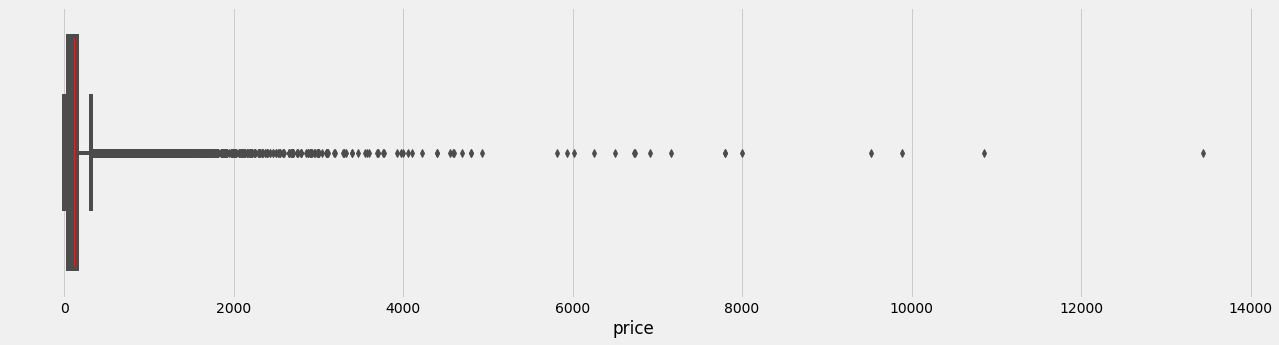

In [ ]:
#Data Order Prices Analysis
plt.figure(figsize=(20,5))
sns.boxplot(x=priceGrouped, color='red')

<AxesSubplot:title={'center':'Top 20 categories of products with more orders'}, xlabel='product_category_name'>

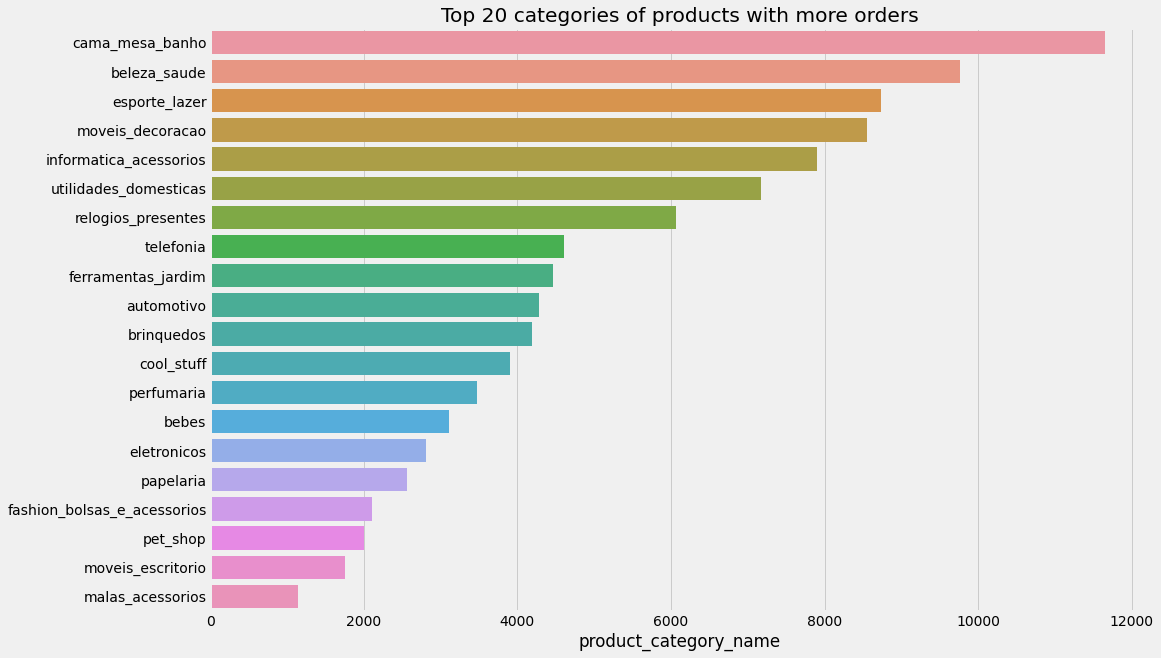

In [ ]:
# Here we will check which are the products with the most purchases

productCategoryOrders = olist['product_category_name'].value_counts().head(20)

plt.figure(figsize=(15,10))
plt.title('Top 20 categories of products with more orders')
sns.barplot(y=productCategoryOrders.index, x=productCategoryOrders, orient='h')

### Recency, Total Spent and Number of Purchases - Feature Creation

First, we are going to create 3 new features by calculating how long it has been since the customer made their last purchase, how much the customer spent in total with the site and how many purchases each customer made, all taking into account the last purchase in the dataset as a reference. So we can perform groupings later.

In [ ]:
#Day of the week feature creation
olist['weekDay'] = olist.order_approved_at.dt.weekday

lastOrder = olist.order_purchase_timestamp.max()

#Recency feature creation
print('Last order on the dataset is at:', lastOrder)

olist['recency'] = ((lastOrder - olist['order_purchase_timestamp']).dt.days)

#Frequency of purchases feature creation - How many unique orders does each customer have
olist['totalOrders'] = olist.groupby('customer_unique_id')['order_id'].transform('nunique')

#Total Spent feature creation
olist['totalSpent'] = olist.groupby('customer_unique_id')['price'].transform('sum')

Last order on the dataset is at: 2018-08-29 15:00:37


In [ ]:
clusteringData = olist[['customer_unique_id', 'totalOrders', 'totalSpent', 'recency']]

#group by the id and show the total orders and total spent, using the minimum recency when there are more than 2 orders.
clusteringData = clusteringData.loc[clusteringData.groupby('customer_unique_id').recency.idxmin()] #.set_index('customer_unique_id')

clusteringData

,customer_unique_id,totalOrders,totalSpent,recency
7123,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,111
96108,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,114
45482,0000f46a3911fa3c0805444483337064,1,69.00,536
46595,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,320
10755,0004aac84e0df4da2b147fca70cf8255,1,180.00,287
...,...,...,...,...
12715,fffcf5a5ff07b0908bd4e2dbc735a684,1,1570.00,446
69990,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,261
104591,ffff371b4d645b6ecea244b27531430a,1,89.90,567
14387,ffff5962728ec6157033ef9805bacc48,1,115.00,118


##### Outliers removing

<AxesSubplot:title={'center':'Outliers from total Spent feature'}, xlabel='totalSpent'>

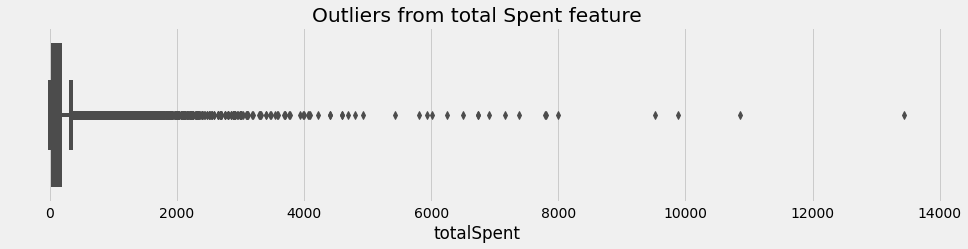

In [ ]:
#Total Spent Outliers
plt.figure(figsize=(15,3))
plt.title('Outliers from total Spent feature')
sns.boxplot(x=clusteringData.totalSpent, color='red')

Old Shape:  (92081, 4)
Lower bound: -117.6
Upper bound: 326.4
New Shape:  (92081, 4)


<AxesSubplot:title={'center':'Total Spent features without outliers'}, xlabel='totalSpent'>

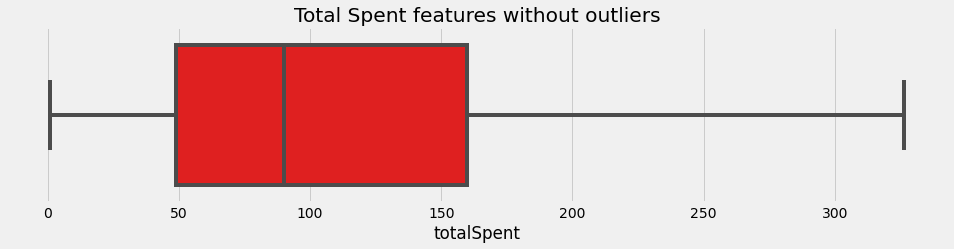

In [ ]:
#Detect the outliers using IQR technique

q1 = clusteringData['totalSpent'].quantile(0.25)
q3 = clusteringData['totalSpent'].quantile(0.75)
iqr = q3 - q1
 
print("Old Shape: ", clusteringData.shape)
 
#Upper and Lower Limits
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

print("Lower bound:", lower)
print("Upper bound:", upper)
 
# new_df = olist[olist['Income'] > upper]
# new_df = olist[olist['Income']  < lower]

# Capping (above or below certain limit, all Incomes will be the same)

clusteringData['totalSpent'] = np.where(clusteringData['totalSpent'] > upper, upper, 
                               np.where(clusteringData['totalSpent'] < lower, lower,
                               clusteringData['totalSpent']))

print("New Shape: ", clusteringData.shape)

#distribution of Income without the greater outliers
plt.figure(figsize=(15,3))
plt.title('Total Spent features without outliers')
sns.boxplot(x=clusteringData['totalSpent'], color='red')

In [ ]:
olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,weekDay,recency,totalOrders,totalSpent
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,9350.0,maua,SP,0,331,2,125.36
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,9350.0,maua,SP,0,331,2,125.36
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,9350.0,maua,SP,0,331,2,125.36
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,87285b34884572647811a353c7ac498a,...,3366,sao paulo,SP,9350.0,maua,SP,1,378,1,29.99
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1.0,87285b34884572647811a353c7ac498a,...,2290,sao paulo,SP,9350.0,maua,SP,2,391,1,29.99


#### Clustering of customers

We can now carry out the grouping of customers, assigning a score to each of the features created and applying the RFM technique.

In [ ]:
#Function to process individual variables, calculate the elbow and Silhouette Scores and cluster by the feature.

def cluster_individual(olist, column, invert=False):
    olist = olist
    columnName = str(column)
    className = "class_" + columnName
    X = olist[column]
    X = pd.DataFrame(X)
    

    print('Results for clustering the feature:', columnName)
    

    # n_clusters = 3

    #Define the model using Elbow method to show best K value 
    kmeans_kwargs = {
        "n_clusters": 5,
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 1,
    }
    
    def sorted_cluster(x, model=None):
        if model == None:
            model = KMeans()
        model = sorted_cluster_centers_(model, x)
        model = sorted_labels_(model, x)
        return model

    def sorted_cluster_centers_(model, x):
        model.fit(x)
        new_centroids = []
        magnitude = []
        for center in model.cluster_centers_:
            magnitude.append(np.sqrt(center.dot(center)))
        idx_argsort = np.argsort(magnitude)
        model.cluster_centers_ = model.cluster_centers_[idx_argsort]
        return model

    def sorted_labels_(sorted_model, x):
        sorted_model.labels_ = sorted_model.predict(x)
        return sorted_model
    
 # Final model 
    km = KMeans(**kmeans_kwargs).fit(X)

 # assign a cluster to each
# X[className] = km.fit_predict(X)
    
    cluster = sorted_cluster(X, km)
    X[className] = cluster.predict(X)
    
#------Plot results of the clustering using the above K

    plt.figure(figsize=(15,3))
    plt.title('Results of clustering')

    sns.scatterplot(x=X[columnName], y=X.index, hue=X[className], s=30)
    
#Append the clustering to the original DataSet
    olist[className] = X[className] + 1

    if invert:
        olist[className] = olist[className].map({5:1,
                                            4:2,
                                            3:3,
                                            2:4,
                                            1:5})

# return data

Results for clustering the feature: recency


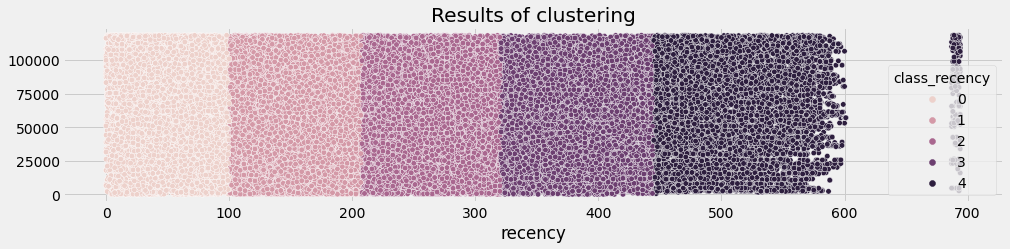

In [ ]:
cluster_individual(clusteringData, 'recency', invert=True)

Results for clustering the feature: totalSpent


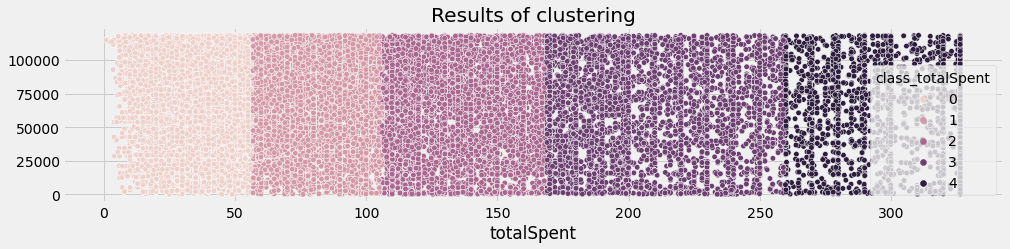

In [ ]:
cluster_individual(clusteringData, 'totalSpent')

Results for clustering the feature: totalOrders


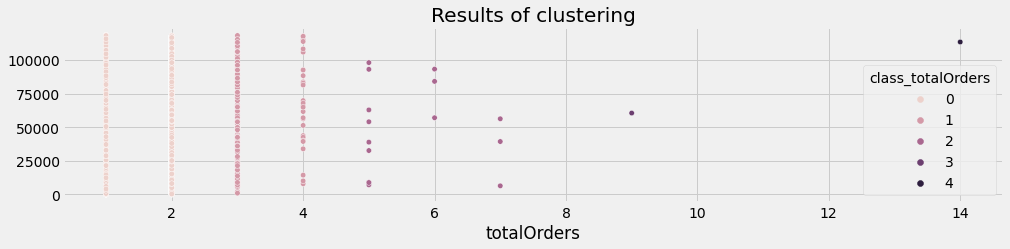

In [ ]:
cluster_individual(clusteringData, 'totalOrders')

##### Customer segmentation using RFM Technique

In [ ]:
#RFM table

def segmentCustomers(olist):
    fmMean = (olist['class_totalOrders'] + olist['class_totalSpent']) / 2
    
    if (olist['class_recency'] >= 4) and (fmMean >= 4):
        return 'Champions'
    if (olist['class_recency'] >= 2 and olist['class_recency'] <= 5) and (fmMean >= 3 and fmMean <= 5):
        return 'Loyal Customers'
    if (olist['class_recency'] >= 3 and olist['class_recency'] <= 5) and (fmMean >= 1 and fmMean <= 3):
        return 'Potential Loyslist'
    if (olist['class_recency'] >= 4 and olist['class_recency'] <= 5) and (fmMean >= 0 and fmMean <= 1):
        return 'New Customers'
    if (olist['class_recency'] >= 3 and olist['class_recency'] <= 4) and (fmMean >= 0 and fmMean <= 1):
        return 'Promising'
    if (olist['class_recency'] >= 2 and olist['class_recency'] <= 3) and (fmMean >= 2 and fmMean <= 3):
        return 'Customer Needing Attention'
    if (olist['class_recency'] >= 2 and olist['class_recency'] <= 3) and (fmMean >= 0 and fmMean <= 2):
        return 'About to Sleep'
    if (olist['class_recency'] >= 0 and olist['class_recency'] <= 2) and (fmMean >= 2 and fmMean <= 5):
        return 'At Risk'
    if (olist['class_recency'] >= 0 and olist['class_recency'] <= 1) and (fmMean >= 4 and fmMean <= 5):
        return "Can't Lose Then"
    if (olist['class_recency'] >= 1 and olist['class_recency'] <= 2) and (fmMean >= 1 and fmMean <= 2):
        return 'Hibernating'
    return 'Lost'

clusteringData['customerSegment'] = clusteringData.apply(segmentCustomers, axis=1)

clusteringData['customerSegment']


7123      Potential Loyslist
96108     Potential Loyslist
45482            Hibernating
46595     Potential Loyslist
10755     Potential Loyslist
                 ...        
12715                At Risk
69990     Potential Loyslist
104591           Hibernating
14387     Potential Loyslist
12295            Hibernating
Name: customerSegment, Length: 92081, dtype: object

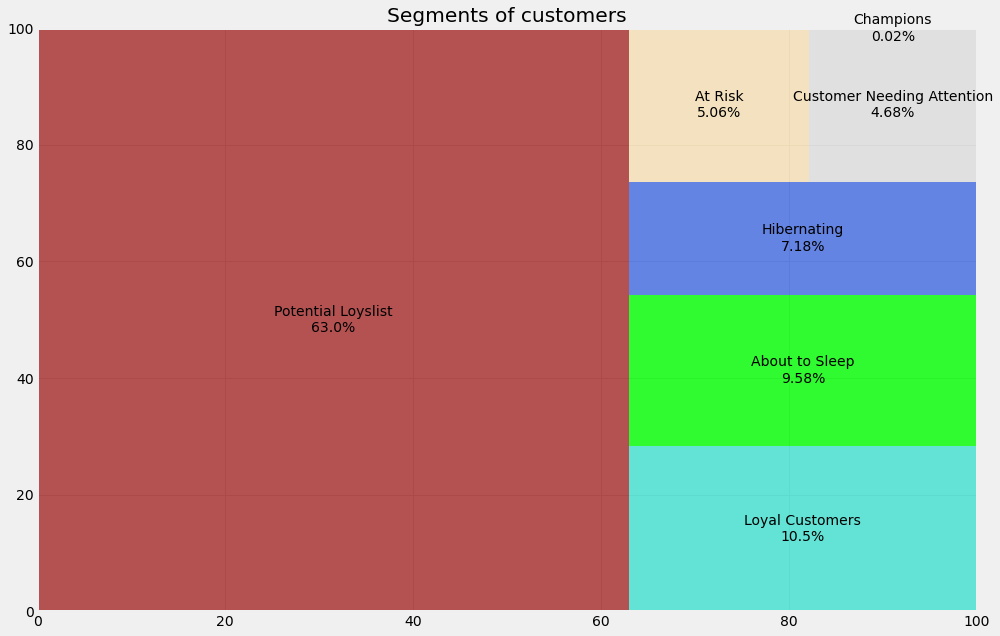

In [ ]:
plotSeg = clusteringData['customerSegment'].value_counts(normalize=True)*100
plotSegIndex = plotSeg.reset_index()

lbl = (plotSeg.index[i] + "\n" + str(round(plotSeg[i], 2)) + '%' for i in range(len(plotSeg)))

# Define the plot sizes
fig, ax = plt.subplots(1, figsize = (15,10))
plt.title('Segments of customers')

sq.plot(sizes= plotSeg,
        color = ['brown','turquoise','lime','royalblue','wheat','gainsboro','aqua','indigo','sandybrown','pink','dodgerblue'],
        pad = False,
        label= lbl,
        alpha = .8)

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sqlalchemy import create_engine

In [ ]:
dataframe= olist[['product_id', 'price', 'customer_id', 'order_id', 'order_purchase_timestamp', 'totalOrders', 'totalSpent']]
dataframe.head()

,product_id,price,customer_id,order_id,order_purchase_timestamp,totalOrders,totalSpent
0,87285b34884572647811a353c7ac498a,29.99,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2,125.36
1,87285b34884572647811a353c7ac498a,29.99,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2,125.36
2,87285b34884572647811a353c7ac498a,29.99,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2,125.36
3,87285b34884572647811a353c7ac498a,29.99,a20e8105f23924cd00833fd87daa0831,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,1,29.99
4,87285b34884572647811a353c7ac498a,29.99,26c7ac168e1433912a51b924fbd34d34,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:47,1,29.99
